# Laboratory Work 4: Supervised and Unsupervised Learning
# Objective: Get acquainted with basic algorithms of supervised and unsupervised learning
# Dataset: Mall Customers Dataset

## 1. Data Preparation

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [29]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1.1. Load the data and perform data cleaning/preparation

In [30]:
df = pd.read_csv("Mall_Customers.csv", delimiter=';')

print("Initial dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

# Data cleaning - remove spaces from column names
df.columns = df.columns.str.strip()
print("\nCleaned column names:")
print(df.columns.tolist())

# Переименуем колонки для удобства
column_mapping = {
    'Customer ID': 'CustomerID',
    'Gender': 'Gender',
    'Age': 'Age',
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1–100)': 'Spending_Score'
}

df = df.rename(columns=column_mapping)
print("\nAfter renaming columns:")
print(df.columns.tolist())

# Drop CustomerID
df = df.drop("CustomerID", axis=1)
print("CustomerID column dropped")

# Encode Gender
print("\nUnique values in Gender column:")
print(df['Gender'].unique())

df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

print("\nDataset after cleaning:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDataset description:")
print(df.describe())


Initial dataset shape: (200, 5)

First 5 rows:
   Customer ID  Gender  Age  Annual Income (k$)  Spending Score (1–100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40

Column names:
['Customer ID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1–100)']

Cleaned column names:
['Customer ID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1–100)']

After renaming columns:
['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']
CustomerID column dropped

Unique values in Gender column:
['Male' 'Female']

Dataset after cleaning:
   Gender  Age  Annual_Income  Spending_Score
0       0   19             15              39
1       0   21             15      

## 2. Supervised Learning
### Task: Predict the customer category (high or low income)
### 2.1. Create a new feature - binary label for income categorization

In [32]:
df['high_income'] = (df['Annual_Income'] > 70).astype(int)

print("Income distribution:")
print(df['high_income'].value_counts())
print("\nHigh income ratio:")
print(df['high_income'].value_counts(normalize=True))

Income distribution:
high_income
0    126
1     74
Name: count, dtype: int64

High income ratio:
high_income
0    0.63
1    0.37
Name: proportion, dtype: float64


## 2.2. Define the input data (X) and the target variable (y)

In [33]:
X = df.drop(['Annual_Income', 'high_income'], axis=1)
y = df['high_income']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeatures:")
print(X.head())

Features (X) shape: (200, 3)
Target (y) shape: (200,)

Features:
   Gender  Age  Spending_Score
0       0   19              39
1       0   21              81
2       1   20               6
3       1   23              77
4       1   31              40


## 2.3. Split the data into training and test sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 140
Test set size: 60


## 2.4. Train models - Logistic Regression and Decision Tree

In [35]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

print("Models trained successfully!")

# Display feature importance for Decision Tree
print("\nDecision Tree Feature Importance:")
for feature, importance in zip(X.columns, dt_classifier.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

Models trained successfully!

Decision Tree Feature Importance:
  Gender: 0.0283
  Age: 0.3361
  Spending_Score: 0.6357


## 2.5. Evaluate model accuracy on the test set

In [36]:
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Model Performance:")
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Model Performance:
Logistic Regression Accuracy: 0.5833
Decision Tree Accuracy: 0.8000


## 2.6. Build confusion matrices

Logistic Regression Confusion Matrix:
[[35  3]
 [22  0]]

Decision Tree Confusion Matrix:
[[34  4]
 [ 8 14]]


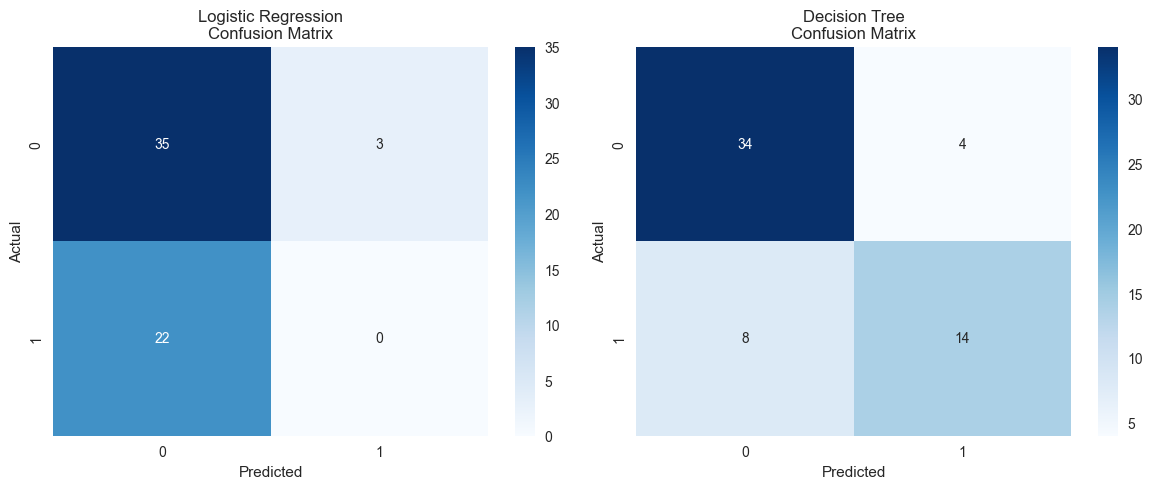


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.92      0.74        38
           1       0.00      0.00      0.00        22

    accuracy                           0.58        60
   macro avg       0.31      0.46      0.37        60
weighted avg       0.39      0.58      0.47        60


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.78      0.64      0.70        22

    accuracy                           0.80        60
   macro avg       0.79      0.77      0.77        60
weighted avg       0.80      0.80      0.79        60



In [38]:
print("Logistic Regression Confusion Matrix:")
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

print("\nDecision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Visualize confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression CM
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic Regression\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Decision Tree CM
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Decision Tree\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

## 3. Unsupervised Learning
### Task: Cluster customers based on income and spending score
### 3.1. Select 2 features for clustering

Features for clustering:
   Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40

Shape: (200, 2)


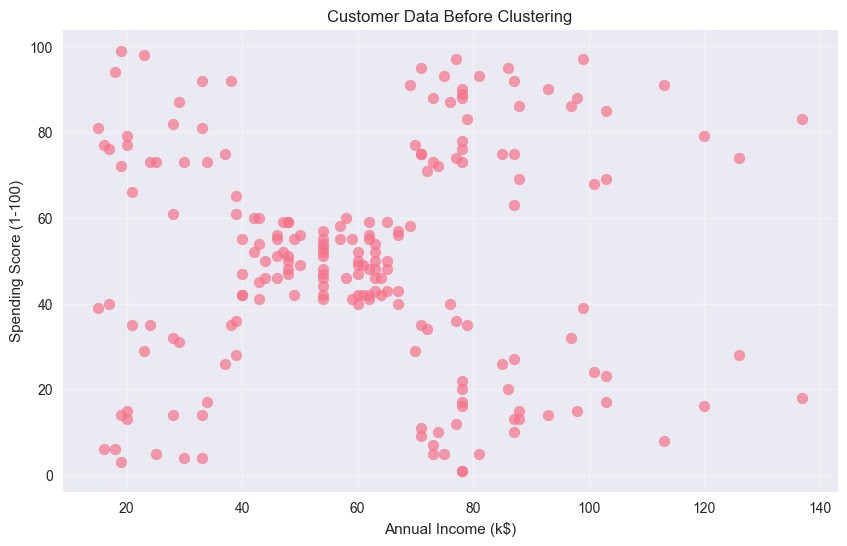

In [39]:
X_cluster = df[['Annual_Income', 'Spending_Score']]

print("Features for clustering:")
print(X_cluster.head())
print(f"\nShape: {X_cluster.shape}")

# Визуализация исходных данных до кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], alpha=0.7, s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data Before Clustering')
plt.grid(True, alpha=0.3)
plt.show()

## 3.2. Perform feature scaling before clustering

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("Scaled features (first 5 rows):")
print(X_scaled[:5])

Scaled features (first 5 rows):
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


# 3.3. Apply the K-Means algorithm for data clustering
# First, let's find the optimal number of clusters using Elbow Method

# 3.4. Elbow Method to find optimal K

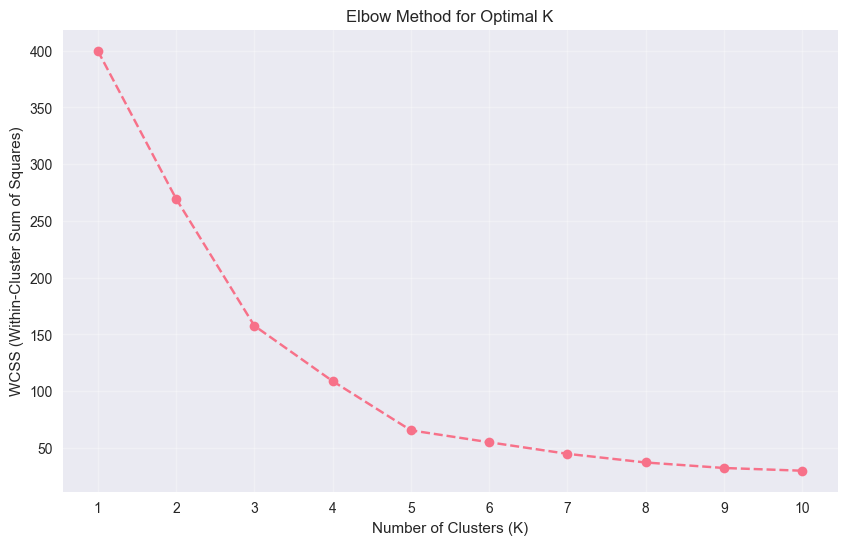

Optimal number of clusters: 5


,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [42]:
wcss = []  # Within-Cluster-Sum-of-Squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.show()

# %%
# Based on elbow method, choose optimal K (usually where the curve bends)
optimal_k = 5  # This is typically where the elbow occurs

print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

## 3.5. Save the predicted values

In [43]:
clusters = kmeans.predict(X_scaled)

print("Cluster distribution:")
unique, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} customers")

Cluster distribution:
Cluster 0: 81 customers
Cluster 1: 39 customers
Cluster 2: 22 customers
Cluster 3: 35 customers
Cluster 4: 23 customers


## 3.6. Add clusters to the main dataset

In [44]:
df['Cluster'] = clusters

print("Dataset with clusters:")
print(df.head())

Dataset with clusters:
   Gender  Age  Annual_Income  Spending_Score  high_income  Cluster
0       0   19             15              39            0        4
1       0   21             15              81            0        2
2       1   20             16               6            0        4
3       1   23             16              77            0        2
4       1   31             17              40            0        4


## 3.7. Visualize the clusters using PCA

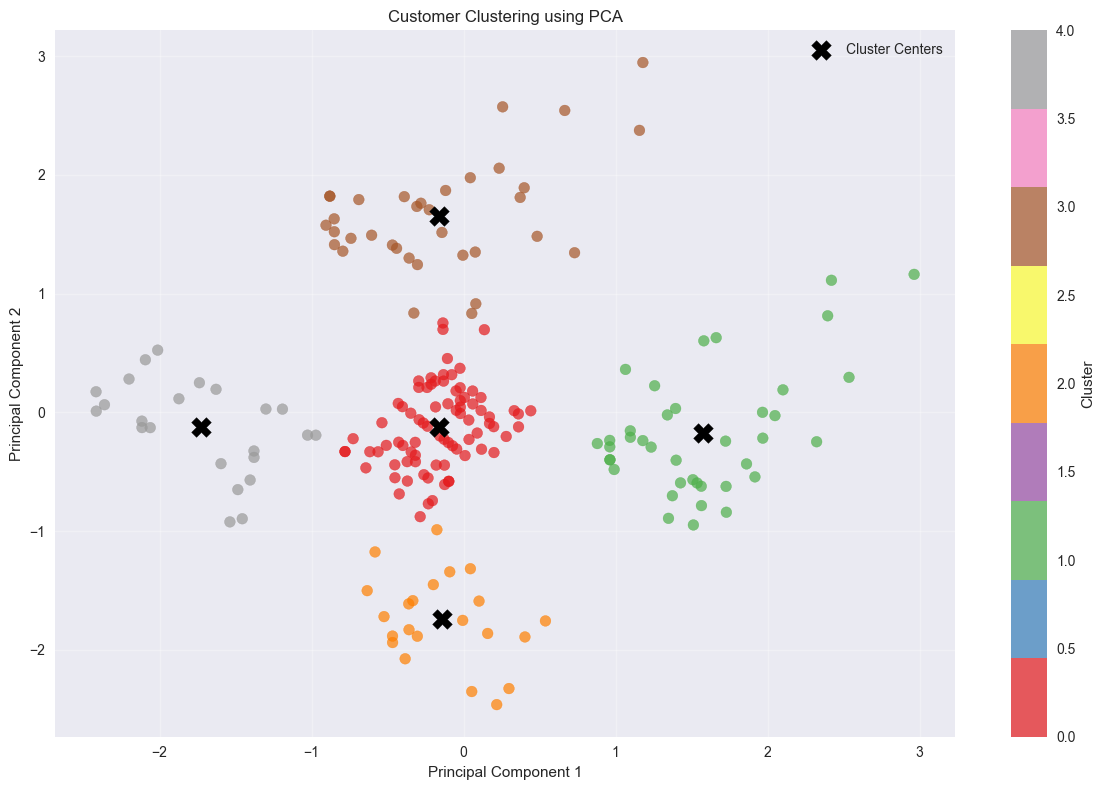

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', alpha=0.7, s=60)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clustering using PCA')
plt.grid(True, alpha=0.3)

# Add cluster centers in PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker='X', s=200, label='Cluster Centers')
plt.legend()

plt.tight_layout()
plt.show()


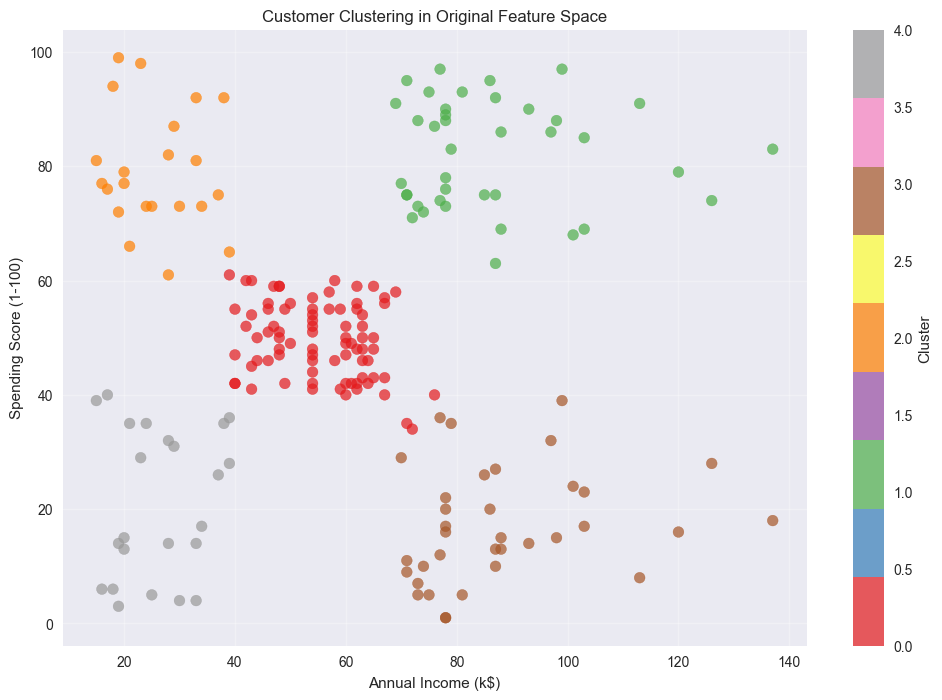


Cluster Analysis (mean values):
         Annual_Income  Spending_Score        Age    Gender
Cluster                                                    
0            55.296296       49.518519  42.716049  0.592593
1            86.538462       82.128205  32.692308  0.538462
2            25.727273       79.363636  25.272727  0.590909
3            88.200000       17.114286  41.114286  0.457143
4            26.304348       20.913043  45.217391  0.608696


In [47]:
# Additional visualization: Original feature space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Annual_Income'], df['Spending_Score'],
                     c=df['Cluster'], cmap='Set1', alpha=0.7, s=60)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clustering in Original Feature Space')
plt.grid(True, alpha=0.3)
plt.show()

# Анализ кластеров
print("\nCluster Analysis (mean values):")
cluster_analysis = df.groupby('Cluster')[['Annual_Income', 'Spending_Score', 'Age', 'Gender']].mean()
print(cluster_analysis)

## 4. Questions
### 4.1. What is the key difference between supervised and unsupervised learning?
**Answer:**
The key difference is that in **supervised learning**, we have labeled data and the algorithm learns to map input features to known output labels. In **unsupervised learning**, we work with unlabeled data and the algorithm finds patterns and structures in the data without any guidance from known outcomes.

In this assignment:
- **Supervised learning**: We predicted 'high income' category using known labels
### 4.2. What influences the choice of the number of clusters in K-Means?
**Answer:**
The choice of the number of clusters (K) in K-Means is influenced by:
1. **Elbow Method**: We look for the "elbow" point in the WCSS vs K plot where the rate of decrease sharply changes
2. **Domain knowledge**: Understanding the business context and what makes sense for the data
3. **Cluster interpretability**: Clusters should be meaningful and actionable
4. **Cluster size balance**: Avoiding clusters that are too small or too large
5. **Silhouette analysis**: Measuring how similar objects are within clusters compared to other clusters

In our analysis, we used the Elbow Method and chose K=5 as it appeared to be the point where adding more clusters doesn't significantly improve the model.

### 4.3. Why was PCA used when visualizing the clusters?

**Answer:**
PCA (Principal Component Analysis) was used for visualization because:
1. **Dimensionality reduction**: We had multiple features, but we can only visualize 2D or 3D plots effectively
2. **Feature combination**: PCA creates new features (principal components) that are linear combinations of original features while preserving maximum variance
3. **Better separation**: Sometimes clusters become more clearly separated in the principal component space
4. **Noise reduction**: PCA can help reduce noise in the data by focusing on the most important variance components

However, for interpretation, it's also useful to visualize clusters in the original feature space to understand what the features represent.


LABORATORY WORK 4 - SUMMARY

SUPERVISED LEARNING RESULTS:
Best model accuracy: 0.8000
Best model: Decision Tree
Models used: Logistic Regression, Decision Tree

UNSUPERVISED LEARNING RESULTS:
Optimal number of clusters: 5
Clustering features: Annual Income, Spending Score
Clustering algorithm: K-Means with Elbow Method

DATASET INFORMATION:
Total customers: 200
Features: ['Gender', 'Age', 'Annual_Income', 'Spending_Score', 'high_income', 'Cluster']
High income customers: 74 (37.0%)

Final dataset with clusters (first 10 rows):
   Gender  Age  Annual_Income  Spending_Score  high_income  Cluster
0       0   19             15              39            0        4
1       0   21             15              81            0        2
2       1   20             16               6            0        4
3       1   23             16              77            0        2
4       1   31             17              40            0        4
5       1   22             17              76            0 

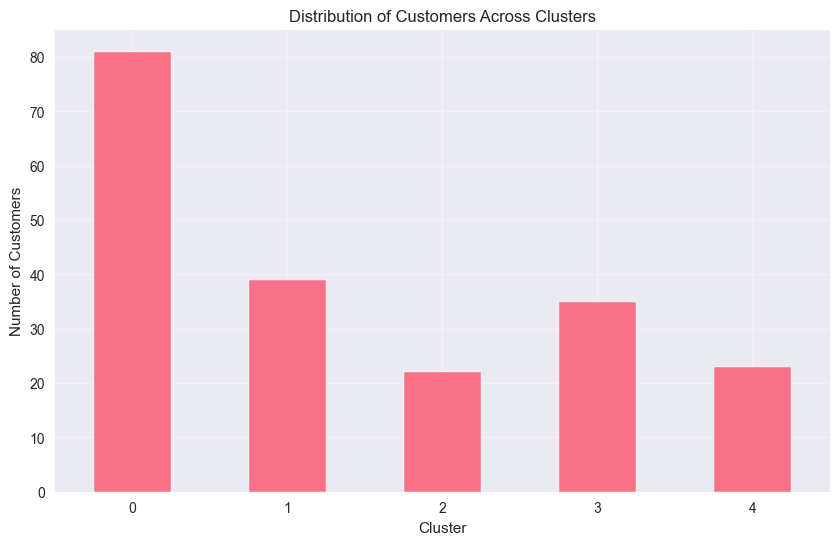

In [48]:
# Final summary
print("=" * 50)
print("LABORATORY WORK 4 - SUMMARY")
print("=" * 50)

print("\nSUPERVISED LEARNING RESULTS:")
print(f"Best model accuracy: {max(accuracy_log, accuracy_dt):.4f}")
if accuracy_log > accuracy_dt:
    print("Best model: Logistic Regression")
else:
    print("Best model: Decision Tree")
print("Models used: Logistic Regression, Decision Tree")

print("\nUNSUPERVISED LEARNING RESULTS:")
print(f"Optimal number of clusters: {optimal_k}")
print("Clustering features: Annual Income, Spending Score")
print("Clustering algorithm: K-Means with Elbow Method")

print("\nDATASET INFORMATION:")
print(f"Total customers: {len(df)}")
print(f"Features: {df.columns.tolist()}")
print(f"High income customers: {df['high_income'].sum()} ({df['high_income'].mean()*100:.1f}%)")

# Display final dataset with clusters
print("\nFinal dataset with clusters (first 10 rows):")
print(df.head(10))

# %%
# Дополнительная визуализация: распределение по кластерам
plt.figure(figsize=(10, 6))
df['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()